# Santander Customer Transaction Prediction

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# Loading data

In [0]:
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dltrain.csv')


In [0]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
data.shape

(200000, 202)

In [0]:
data=data.drop('ID_code',axis=1)

In [11]:
data.shape

(200000, 201)

In [0]:
dftest = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dltest.csv')

In [0]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

In [0]:
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]


<Figure size 432x288 with 0 Axes>

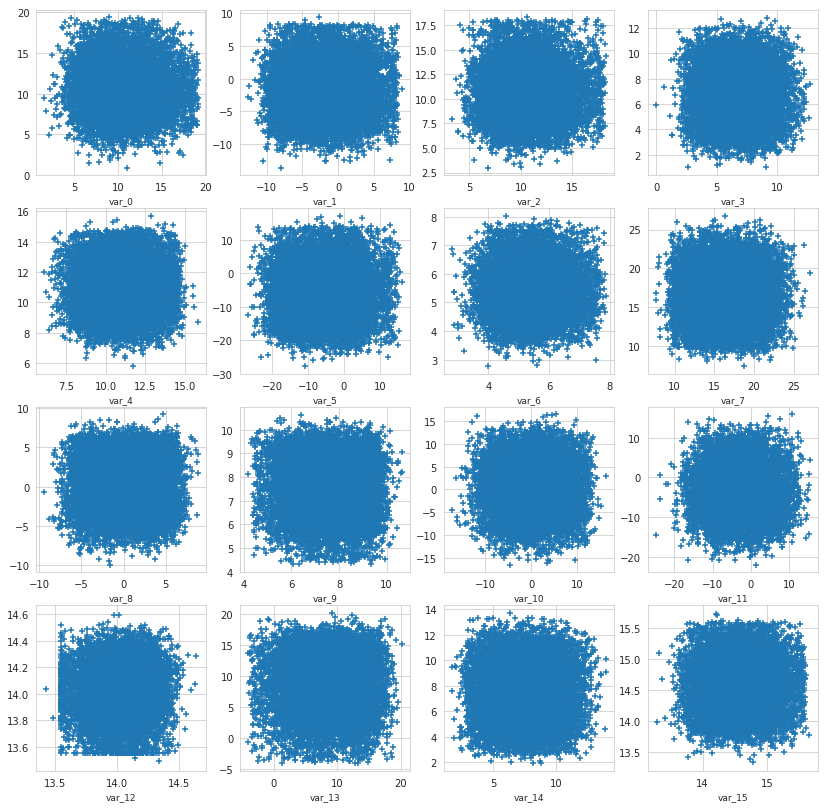

In [20]:
plot_feature_scatter(data[::20],dftest[::20], features)

In [0]:
X,y=data.drop('target',axis=1),data['target']

In [23]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [25]:
print(data.isnull().values.any())


False


In [26]:
y.value_counts()


0    179902
1     20098
Name: target, dtype: int64

Text(0, 0.5, 'Frequency')

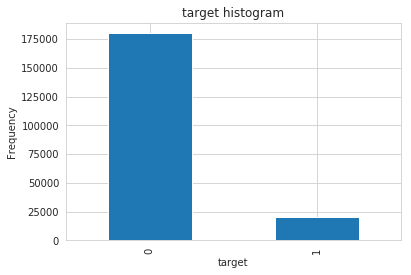

In [27]:
pd.value_counts(data['target']).plot.bar()
plt.title('target histogram')
plt.xlabel('target')
plt.ylabel('Frequency')

In [28]:
count_no_sub = len(data[data['target']==0])
count_sub = len(data[data['target']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", round(pct_of_no_sub*100,2))
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", round(pct_of_sub*100,2))

percentage of no subscription is 89.95
percentage of subscription 10.05


# Split Train & Test

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50,shuffle=True)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation, Dropout
import gc

Using TensorFlow backend.


In [31]:
classes=1
model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(200,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='sigmoid'))



Instructions for updating:
Colocations handled automatically by placer.


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                3216      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,369
Trainable params: 4,369
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model

In [34]:
history=model.fit(X_train,y_train,batch_size=2048,epochs=20,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 140000 samples, validate on 60000 samples
Epoch 1/20
140000/140000 [==============================] - 4s 26us/step - loss: 0.5186 - acc: 0.8725 - val_loss: 0.3300 - val_acc: 0.8992
Epoch 2/20
140000/140000 [==============================] - 1s 9us/step - loss: 0.3241 - acc: 0.8991 - val_loss: 0.3169 - val_acc: 0.8996
Epoch 3/20
140000/140000 [==============================] - 1s 9us/step - loss: 0.3088 - acc: 0.8993 - val_loss: 0.2948 - val_acc: 0.9008
Epoch 4/20
140000/140000 [==============================] - 1s 10us/step - loss: 0.2842 - acc: 0.9012 - val_loss: 0.2744 - val_acc: 0.9038
Epoch 5/20
140000/140000 [==============================] - 1s 9us/step - loss: 0.2721 - acc: 0.9029 - val_loss: 0.2664 - val_acc: 0.9044
Epoch 6/20
140000/140000 [==============================] - 1s 9us/step - loss: 0.2640 - acc: 0.9050 - val_loss: 0.2615 - val_acc: 0.9058
Epoch 7/20
140000/140000 [==============================] - 1s 9us/step

# Complexity graph

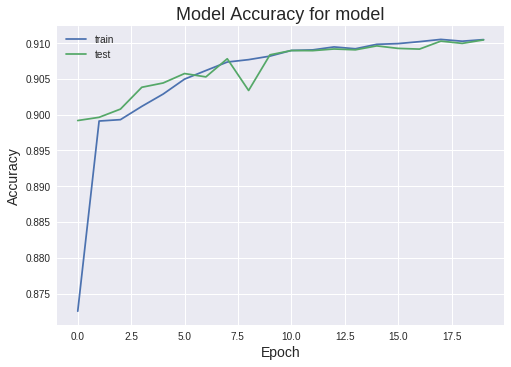

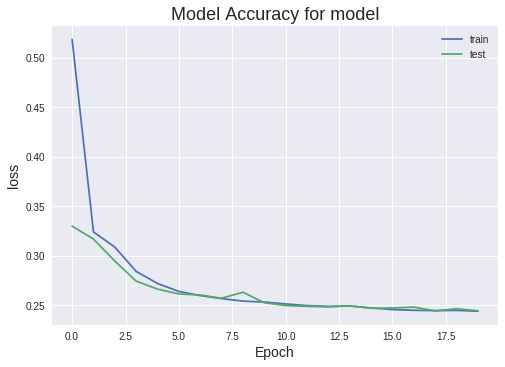

In [35]:
plt.style.use('seaborn')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.title('Model Accuracy for model', fontsize = 18)
plt.legend(['train','test'])
plt.show()

plt.style.use('seaborn')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.title('Model Accuracy for model', fontsize = 18)
plt.legend(['train','test'])
plt.show()

In [36]:
sc_train = model.evaluate(X_train,y_train,verbose=0)
print('Accuracy',sc_train)

Accuracy [0.24203522495286806, 0.9113357142857142]


In [37]:
sc_test = model.evaluate(X_test,y_test,verbose=0)
print('Accuracy',sc_test)

Accuracy [0.24442557377616564, 0.91045]


In [0]:
pred0=model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred0.round()))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53990
           1       0.65      0.24      0.34      6010

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.78      0.61      0.65     60000
weighted avg       0.89      0.91      0.89     60000



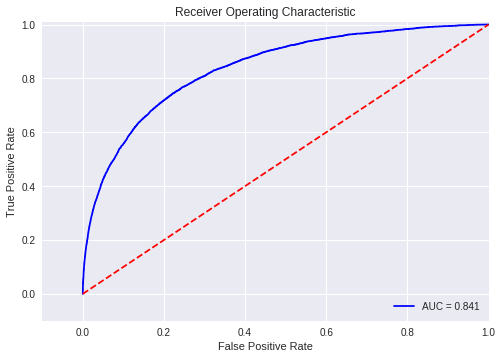

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,pred0)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Oversampling (SMOTE)

In [41]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (140000, 200)
Number transactions y_train dataset:  (140000,)
Number transactions X_test dataset:  (60000, 200)
Number transactions y_test dataset:  (60000,)


In [42]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))



Before OverSampling, counts of label '1': 14088
Before OverSampling, counts of label '0': 125912 



In [43]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (251824, 200)
After OverSampling, the shape of train_y: (251824,) 

After OverSampling, counts of label '1': 125912
After OverSampling, counts of label '0': 125912


In [0]:
classes=1
model1 = Sequential()
model1.add(Dense(16,activation='relu', input_shape=(200,)))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(classes,activation='sigmoid'))


In [45]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                3216      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,369
Trainable params: 4,369
Non-trainable params: 0
_________________________________________________________________


# Model

In [0]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
history2=model1.fit(X_train,y_train,batch_size=2048,epochs=20,validation_data=(X_test,y_test))

Train on 140000 samples, validate on 60000 samples
Epoch 1/20
140000/140000 [==============================] - 2s 11us/step - loss: 0.3374 - acc: 0.8985 - val_loss: 0.3146 - val_acc: 0.8996
Epoch 2/20
140000/140000 [==============================] - 1s 10us/step - loss: 0.3003 - acc: 0.8999 - val_loss: 0.2829 - val_acc: 0.9010
Epoch 3/20
140000/140000 [==============================] - 1s 10us/step - loss: 0.2728 - acc: 0.9030 - val_loss: 0.2627 - val_acc: 0.9059
Epoch 4/20
140000/140000 [==============================] - 1s 10us/step - loss: 0.2610 - acc: 0.9058 - val_loss: 0.2567 - val_acc: 0.9070
Epoch 5/20
140000/140000 [==============================] - 1s 10us/step - loss: 0.2570 - acc: 0.9068 - val_loss: 0.2592 - val_acc: 0.9069
Epoch 6/20
140000/140000 [==============================] - 1s 10us/step - loss: 0.2553 - acc: 0.9075 - val_loss: 0.2525 - val_acc: 0.9085
Epoch 7/20
140000/140000 [==============================] - 1s 10us/step - loss: 0.2527 - acc: 0.9084 - val_loss: 0

# Model complexity graph

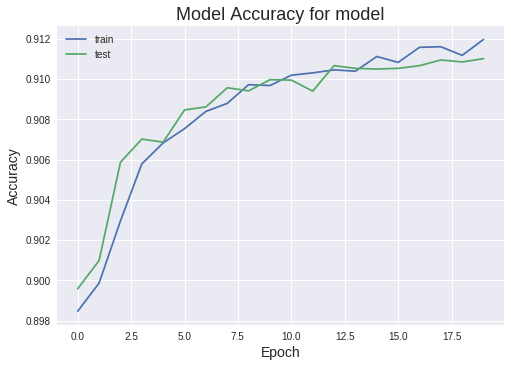

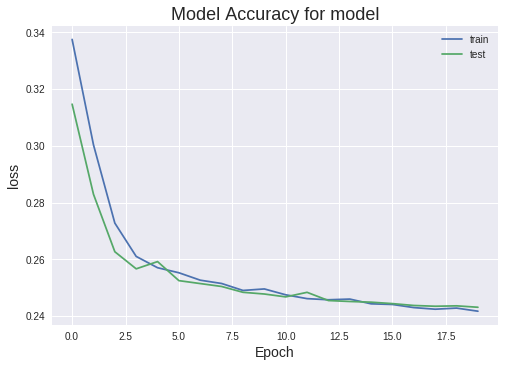

In [48]:
plt.style.use('seaborn')
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.title('Model Accuracy for model', fontsize = 18)
plt.legend(['train','test'])
plt.show()

plt.style.use('seaborn')
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.title('Model Accuracy for model', fontsize = 18)
plt.legend(['train','test'])
plt.show()

In [49]:
sc_train = model1.evaluate(X_train,y_train,verbose=0)
print('Accuracy',sc_train)

Accuracy [0.24022626929112842, 0.9121214285714285]


In [50]:
sc_train = model1.evaluate(X_test,y_test,verbose=0)
print('Accuracy',sc_train)

Accuracy [0.24311860900719962, 0.9110166666666667]


In [0]:
pred1=model1.predict(X_test)

In [52]:
print(classification_report(y_test,pred1.round()))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     53990
           1       0.65      0.25      0.36      6010

   micro avg       0.91      0.91      0.91     60000
   macro avg       0.78      0.62      0.66     60000
weighted avg       0.89      0.91      0.89     60000



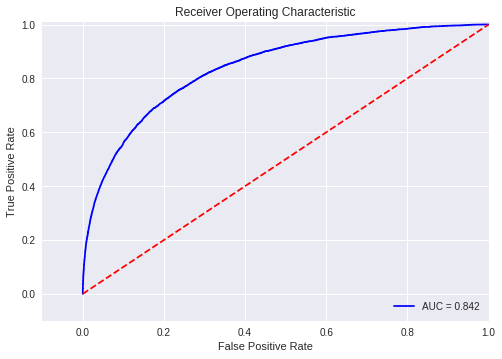

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,pred1)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
dftest = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dltest.csv')


In [55]:
dftest.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [0]:
sam = pd.read_csv('/gdrive/My Drive/Colab Notebooks/sample_submission.csv')

In [0]:
dftest = dftest.loc[:,dftest.columns!='ID_code']

In [0]:
#dftest.head()

In [0]:
pred2 = model1.predict(dftest)


In [60]:
pred2

array([[0.12543145],
       [0.24745682],
       [0.05106115],
       ...,
       [0.00530162],
       [0.14699215],
       [0.12536925]], dtype=float32)

In [61]:
pred2.shape

(200000, 1)

In [0]:
#print(classification_report(sam,pred2.round()))

# Creating Submission file

In [0]:
s = pd.DataFrame({'ID_code':sam['ID_code'],'target':pred2.ravel()})

In [64]:
s.head()

,ID_code,target
0,test_0,0.125431
1,test_1,0.247457
2,test_2,0.051061
3,test_3,0.187737
4,test_4,0.076925


In [0]:
s.to_csv('C:\\Users\\Shreyas\\Desktop\\DL\\submit.csv',index=False)